
#  'tmdb-movies' data set investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [62]:
# import statements for all of the packages planned to be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [63]:
# Load data and print out a few lines. Perform operations to 
#inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv("E:/Udacity/project 3/tmdb-movies.csv")
                 
#Data representation
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [64]:
#View the dimensions of data frame to know the size
df.shape

(10866, 21)

In [65]:
#Investigate the data types of columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [66]:
#Summary of data frame including an initial investigation for the NAN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [67]:
#show the exact number of NAN values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [68]:
#show the duplicated rows
df.duplicated().sum()

1

In [69]:
#show some statistical analysis
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='ask_result'></a>
By this time i know the questions to ask.
### 1- Ask questions:
>1- Which genres are most popular from year to year? 
>
>2- Which are the production companies with most productions?
>
>3- Are movies with high budget successful?

**Bad Columns with lots of NANs:** homepage, tagline, keywords

### Gather Data

In [70]:
#Selected columns are :[id, popularity, budget, original_title, cast, director,
# runtime, genres, production_companies, vote_count, vote_average, release_year]
# There are two ways to do this either drop columns or choose columns ----> I chose to drop columns and add it to clean_df
clean_df = df.drop(['imdb_id', 'homepage','tagline','keywords','overview','release_date','budget_adj','revenue_adj'], axis=1)
clean_df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015


### Clean Data
### The important question to answer is: Is the NAN values the only missing data ?

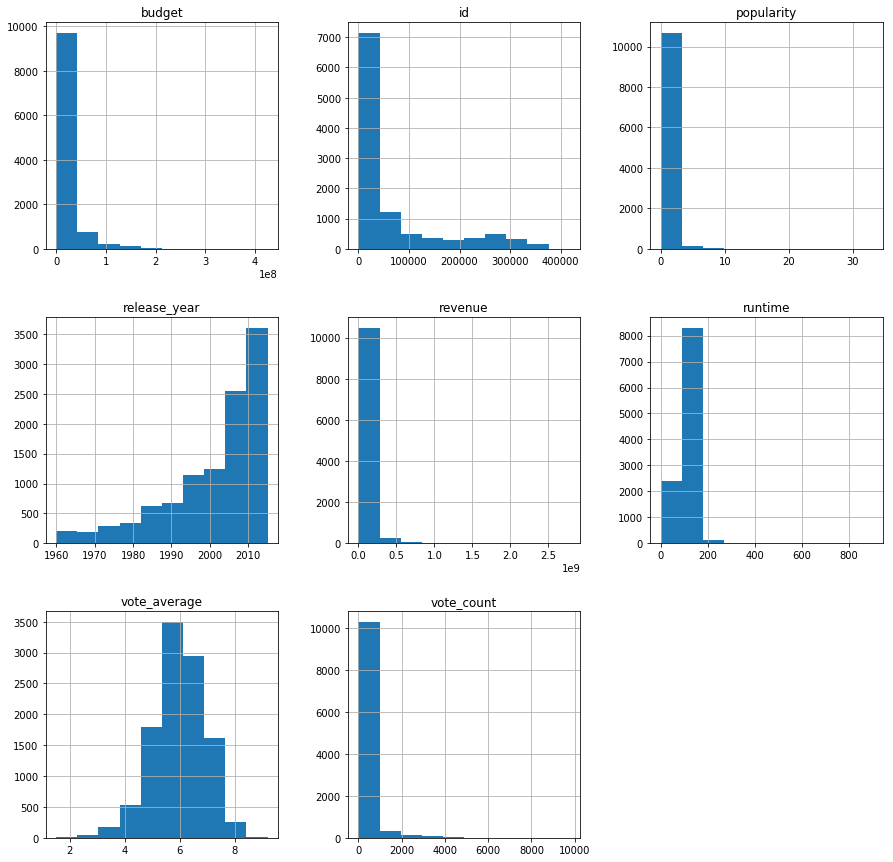

In [71]:
clean_df.hist(figsize=(15,15));

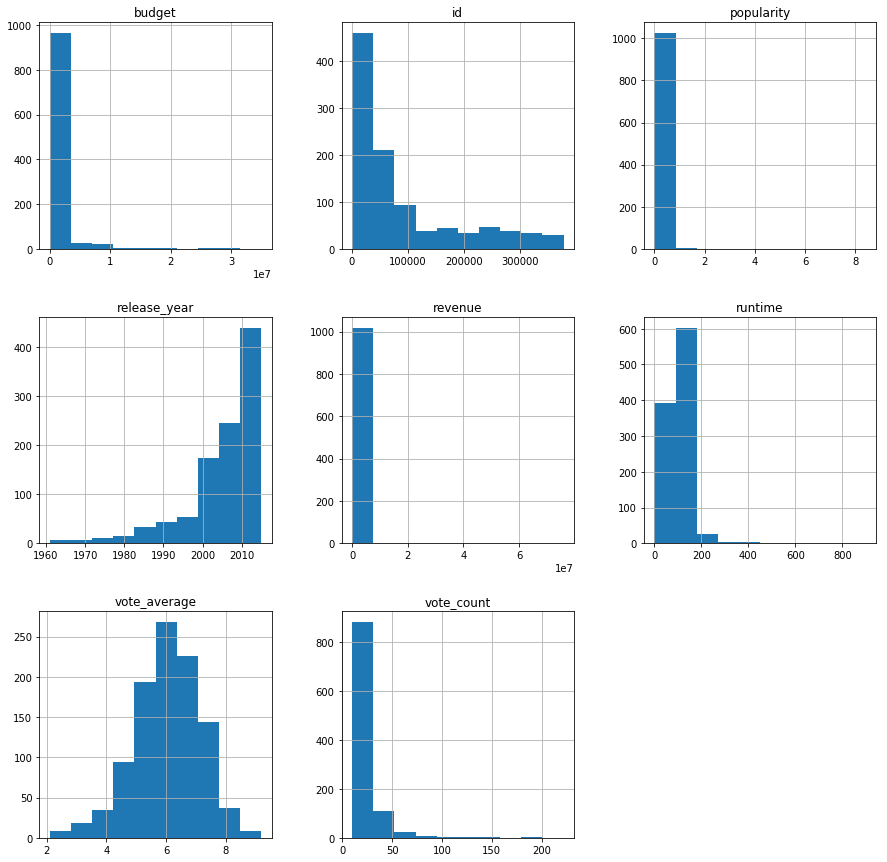

In [72]:
clean_df[clean_df.production_companies.isnull()].hist(figsize=(15,15));

In [73]:
# Check for the NAN count before cleaning
clean_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [74]:
#Inspect the dataframe with '0'
#clean_df[clean_df.revenue==0]

In [75]:
#this will clear rows with '0'
#clean_df = clean_df[clean_df.budget != 0]
#clean_df = clean_df[clean_df.revenue != 0]

In [76]:
(clean_df.revenue==0).sum(),(clean_df.budget==0).sum()

(6016, 5696)

### Dealing with missing values:
production_companies column alone has 1030 missing values but since its a string we can't fill it with a mean value.

Best way to deal with this is to eliminate the rows with missing values, since the dataset is big this will applicable.

Similar to columns: cast, director, genres they have less missing values with respect to production_companies

We need to make assumption:

            budget revenue -> result
             0       0     -> movie not out yet
             0       value -> missing value 
             value   0     -> maybe movie not out yet ? missing data?
Is the best practice to drop all the '0's value ? with consideration that if you drop it will drop 6000 row !
             

In [77]:
# Drop NAN rows
clean_df.dropna(inplace= True)

In [78]:
# Check for the NAN count after cleaning
clean_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [79]:
# Check for duplicates
clean_df.duplicated().sum()

1

In [80]:
# Drop 1 duplicated row
clean_df.drop_duplicates(inplace= True)

### Assess Data

In [81]:
# Check if there is any column needs to change its data type
clean_df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

In [82]:
#Get the unique years
unique_years = clean_df['release_year'].value_counts().index.values
unique_years

array([2014, 2013, 2015, 2012, 2009, 2011, 2008, 2010, 2007, 2006, 2005,
       2003, 2004, 2002, 2001, 1999, 1996, 2000, 1998, 1997, 1994, 1993,
       1995, 1988, 1989, 1992, 1990, 1991, 1987, 1986, 1985, 1984, 1982,
       1981, 1983, 1980, 1978, 1979, 1971, 1973, 1977, 1976, 1966, 1974,
       1975, 1964, 1970, 1968, 1972, 1967, 1963, 1965, 1960, 1961, 1962,
       1969], dtype=int64)

#### Get the most popular genres based on released year ( Column genres depending on released year)

In [83]:
# Take a subset from the whole data
small_df = clean_df[['release_year','genres']]

# Group by 'release_year' column -> aggregate the output (genres) with index [0] of value_counts() function
# which returns the most frequent (genres) based on this year grouped by it
year_genres_df = small_df.groupby(['release_year']).agg(lambda x:x.value_counts().index[0])

# Add column with the count of repeatition of the most frequent genre per year
year_genres_df['count'] = small_df.groupby(['release_year']).agg(lambda x:x.value_counts()[0])

# Display the result
year_genres_df

,genres,count
release_year,,
1960,Horror,3
1961,Drama,3
1962,Drama,4
1963,Horror,3
1964,Comedy|Romance,5
1965,Drama,2
1966,Action|Western,3
1967,Comedy|Drama|Romance,4
1968,Drama,3


Now we have the answer for the first question move on to the second question

### Research Question 2: Which are the production companies with most productions?

In [84]:
# Get the count of unique values in production_companies column.
unique_production_companies=(clean_df['production_companies'].value_counts())

# Filter only those company with more than 10 productions
unique_production_companies=unique_production_companies[unique_production_companies>=10]

# Show result
unique_production_companies

Paramount Pictures                                    156
Universal Pictures                                    133
Warner Bros.                                           84
Walt Disney Pictures                                   75
Columbia Pictures                                      72
Metro-Goldwyn-Mayer (MGM)                              72
New Line Cinema                                        61
Touchstone Pictures                                    51
20th Century Fox                                       50
Twentieth Century Fox Film Corporation                 49
TriStar Pictures                                       45
Orion Pictures                                         42
Miramax Films                                          32
DreamWorks Animation                                   31
Columbia Pictures Corporation                          31
Walt Disney Productions                                29
Dimension Films                                        28
United Artists

<a id='conclusions'></a>
## Conclusions


### First question findings more clear through this visualization

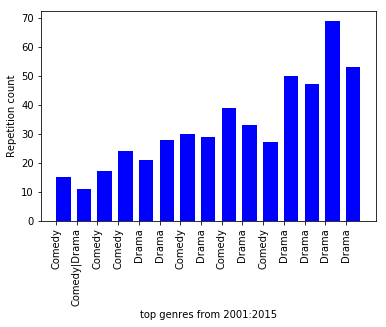

In [85]:
y = year_genres_df['count'].tail(15)
names_genres = year_genres_df['genres'].tail(15)
N = len(y)
x = range(N)
width = 0.7
plt.bar(x, y, width, color="blue",align='edge')
plt.xticks(x,names_genres,rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.xlabel('top genres from 2001:2015')
plt.ylabel('Repetition count');

We can see that Drama genre is most frequent obviously in the last years from 2001:2015 with large amount of movies in 2014.

### Second question findings more clear through this visualization

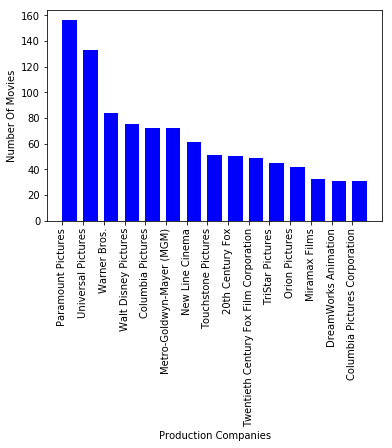

In [86]:
y = unique_production_companies.head(15)
names_production = (clean_df["production_companies"].value_counts()>10).index.values
N = len(y)
x = range(N)
width = 0.7
plt.bar(x, y, width, color="blue",align='edge')
plt.xticks(x,names_production,rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.xlabel('Production Companies')
plt.ylabel('Number Of Movies');

### The third question
#### Are movies with high budget successful?

Check for there any correlation between budget & revenue to continue with the analysis (if they aren't correlated we can't answer this question).

In [87]:
# Correlation function
corr = clean_df.corr()

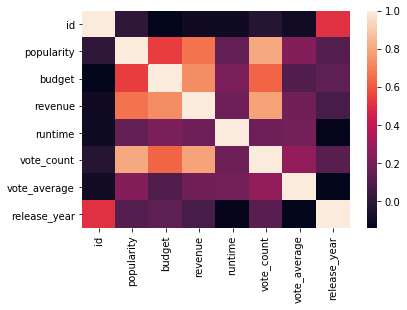

In [88]:
# Beautiful seaborn heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

### What is most important is to get insights from this graph is that we can see:

budget -> revenue (correlated)

So that we can in the future improve this analysis to answer more questions about this.


### Set the small_df we work on to compare budget - revenue

In [89]:
small_df = clean_df[['budget','revenue']]

#Sort based on revenue
small_df.sort_values('revenue')

#Set the index as movie name
small_df.index=clean_df['original_title']
small_df

,budget,revenue
original_title,,
Jurassic World,150000000,1513528810
Mad Max: Fury Road,150000000,378436354
Insurgent,110000000,295238201
Star Wars: The Force Awakens,200000000,2068178225
Furious 7,190000000,1506249360
The Revenant,135000000,532950503
Terminator Genisys,155000000,440603537
The Martian,108000000,595380321
Minions,74000000,1156730962


### We will be working on top 10 movies both in successful & failed

In [90]:
#Successful movies are those whose revenue >= budget
success_movies = small_df[small_df.revenue>=small_df.budget].head(10)

#Failed movies are those whose revenue < budget
#Since the question for '0' values is ambigous lets just neglect columns with '0' values
fail_movies = small_df[small_df.revenue<small_df.budget]
fail_movies = fail_movies[fail_movies.revenue != 0]
fail_movies = fail_movies.head(10)

#Make sure that the sum of both of them equals total count
success_movies.count() + fail_movies.count() == small_df.count()
success_movies

,budget,revenue
original_title,,
Jurassic World,150000000,1513528810
Mad Max: Fury Road,150000000,378436354
Insurgent,110000000,295238201
Star Wars: The Force Awakens,200000000,2068178225
Furious 7,190000000,1506249360
The Revenant,135000000,532950503
Terminator Genisys,155000000,440603537
The Martian,108000000,595380321
Minions,74000000,1156730962


In [91]:
fail_movies

,budget,revenue
original_title,,
Mortdecai,60000000,30418560
Blackhat,70000000,17752940
In the Heart of the Sea,100000000,93820758
Pan,150000000,128388320
Tracers,11000000,1863315
Maggie,4000000,187112
Child 44,50000000,3324330
Scouts Guide to the Zombie Apocalypse,15000000,14860766
Heist,8900000,50136


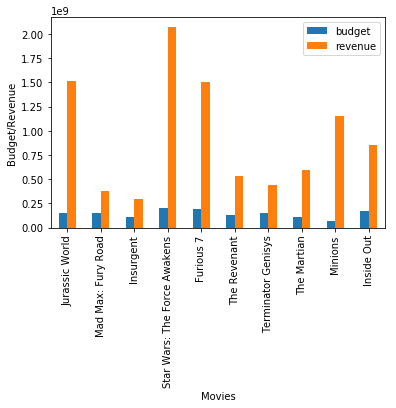

In [92]:
success_movies.plot.bar(rot='vertical')
plt.subplots_adjust(bottom=0.15)
plt.xlabel('Movies')
plt.ylabel('Budget/Revenue');

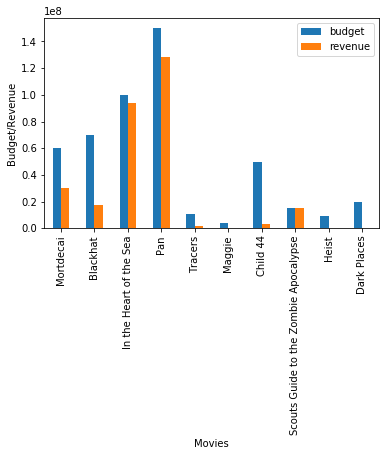

In [93]:
ax = fail_movies.plot.bar(rot='vertical')
plt.subplots_adjust(bottom=0.15)
plt.xlabel('Movies')
plt.ylabel('Budget/Revenue');

### The result of this analysis is sufficient to say that when the budget is high the movie will succeed ?

The answer is no because there is a movie with high budget but it failed in the end so the budget alone can not determine if the movie will succeed or not. 